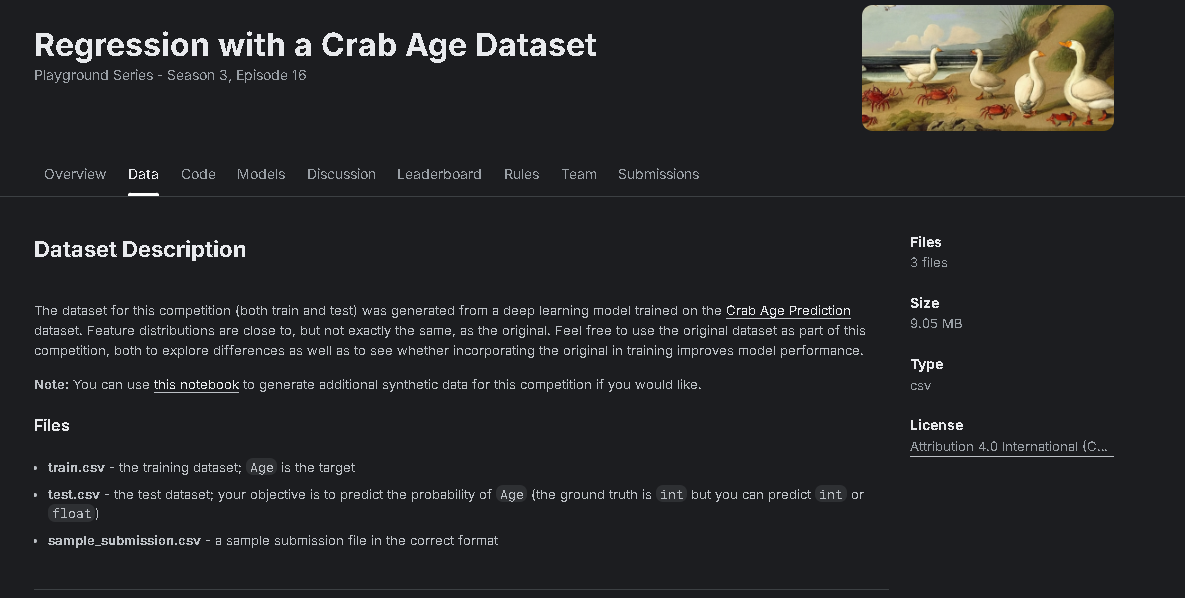

# DataSet:

### columns

Sex	Length	, Diameter	, Height	, Weight	, Shucked Weight	, Viscera Weight, 	Shell Weight, 	Age, 

Sexo , Longitud,  Diámetro , Altura,  Peso,  Peso descascarado , Peso de las vísceras,  Peso de la cáscara , Edad

### target = Age

# Imports and Configuration / Librerías

In [1]:
import os
import warnings
from pathlib import Path
# import skimpy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from pandas.api.types import CategoricalDtype

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("ggplot")  # Cambiar a ggplot o algún estilo válido

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

sns.set_style("whitegrid")
# Mute warnings
warnings.filterwarnings('ignore')


In [3]:
# import sys
# import os
# sys.path.append('/kaggle/input/my-py-personal-utils-problemas-de-regresin')

# Importar el módulo de clases y objetos personales especificamente diseñado para manipular datos tabulares con pandas.
# import my
from my import *


# Info.

## Data - info() - describe() - missing_values() - duplicates()

In [4]:
import pandas as pd
from pathlib import Path

def data_load():
    data_dir = Path("C:/Users/Usuario/Desktop/fcp ML and DL proyects/fcp ML and DL proyects/Regression Problems/Crab Age prediction/")
    train = pd.read_csv(data_dir / "train.csv", index_col="id")
    test = pd.read_csv(data_dir / "test.csv", index_col="id")
    return train, test

train, test = data_load()
# Asegúrate de que la función my_EDA esté definida antes de llamarla
# eda = my_EDA()
display(train)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


In [5]:
import pandas as pd
train  = pd.read_csv("train.csv", index_col = "id" )
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


In [6]:
#Let's check duplicate rows in each dataset
print("Duplicate rows in Train dataset - ", train.duplicated().sum())
print("Duplicate rows in Test dataset - ", test.duplicated().sum())

Duplicate rows in Train dataset -  0
Duplicate rows in Test dataset -  0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [8]:
display(dirp(my_EDA))
print("sa")
eda = my_EDA()
eda.info(train)


['create_features', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'plot_high_corr_heatmap', 'plot_missing', 'plot_variable_distribution', 'scarplot_strongs_vars', 'unique_values', 'vars_list']


None

None

sa

Object my_EDA created

====> This data contains 74051 rows and 9 columns

FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SEVEN SAMPLES  
------------  -----------   ---------------------          -------------  
Sex             object         0 - nan %           I,I,M,M,F,M,F,
Length          float64        0 - nan %           1.175,1.6375,1.1875,1.6375,1.2,1.225,0.7375,
Diameter        float64        0 - nan %           1.225,1.125,1.0875,1.2875,0.9625,1.175,1.1,
Height          float64        0 - nan %           0.3125,0.3875,0.4,0.4375,0.4,0.425,0.3625,
Weight          float64        0 - nan %           29.540179,15.025235,18.653971,35.50774875,29.5118295,7.81028725,9.19941275,
Shucked Weight  float64        0 - nan %           5.499803,0.2551455,18.5122235,9.76640275,16.68368075,1.13398,22.80717275,
Viscera Weight  float64        0 - nan %           8.83086925,9.39785925,0.49611625,7.711064,5.6415505,3.061746,10.24834425,
Shell Weight    float64        0 - nan %    

,count,mean,std,min,25%,50%,75%,max
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


## Conclusiones 

-----

1. **Características numéricas**:
   - Las columnas como **Length**, **Diameter**, **Height**, **Weight**, **Shucked Weight**, **Viscera Weight**, y **Shell Weight** son todas de tipo `float64` y están completas, sin valores nulos.
   - **Age** es la variable objetivo (target) y es de tipo `int64` (números enteros), lo que representa la **edad de los cangrejos**.

2. **Distribución de la edad (Age)**:
   - La media de la edad es aproximadamente 10 años con una desviación estándar de 3.17.
   - El rango de la edad va desde **1 hasta 29 años**, por lo que parece haber una buena variabilidad en los datos de la edad de los cangrejos, lo que es útil para construir un modelo de predicción.

3. **Columna "Sex"**:
   - La variable **Sex** es categórica (`object`), y probablemente representa el sexo del cangrejo (masculino o femenino, por ejemplo). Podría ser útil para agregar esta variable como dummies o utilizar codificación ordinal, dependiendo de cómo la interpretemos.

4. **Relaciones entre las variables**:
   - Las características físicas (como longitud, diámetro, altura, peso, etc.) parecen tener sentido como predictoras de la edad, ya que es probable que la edad influya en el tamaño y la masa de los cangrejos a lo largo del tiempo.

### ¿Conviene aplicar un algoritmo de regresión?

- **Sí, es viable aplicar un algoritmo de regresión.** Aunque la variable objetivo (**Age**) es un valor entero, sigue siendo una variable **continua**, ya que representa una cantidad que cambia gradualmente (la edad en años). La predicción de una variable numérica continua como la edad es un caso clásico para usar **algoritmos de regresión**.
  
  Además, muchos modelos de regresión no requieren que la variable objetivo sea estrictamente continua (puede ser discreta), ya que los modelos pueden ajustarse a variables que cambian en intervalos de valores enteros.

### Recomendaciones para el algoritmo de regresión:

1. **Modelos de regresión lineal o no lineal**:
   - Podríamos empezar con un **regresor lineal** o un modelo como **Random Forest Regressor** o **Gradient Boosting Regressor**, que son capaces de manejar no linealidades en los datos y ofrecer mayor flexibilidad.

2. **Ingeniería de características**:
   - Considerare realizar ingeniería de características. Por ejemplo, crear **relaciones de pesos entre partes del cuerpo** o **proporciones entre las dimensiones físicas** (como altura/longitud o diámetro/longitud), que podrían tener una relación no lineal con la edad.
   - También podría incluir el **sexo** del cangrejo como una variable categórica con codificación adecuada.

3. **Escalado de las características**:
   - Dado que los rangos de valores de las características (por ejemplo, longitud y peso) varían considerablemente, puede ser útil **escalar** o **normalizar** los datos para mejorar el rendimiento de algunos algoritmos de regresión.

4. **Evaluación del modelo**:
   - Utilizare métricas como **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)** o **R²** para evaluar la calidad del ajuste del modelo a la hora de predecir la edad de los cangrejos.

jorar la precisión de las predicciones.

----

## conclusiones finales

* Age: nuestro target/objetivo, está en años (variable discreta), siendo la edad maxima 29. Pese a esto aun podemos aplicar algoritmos de ML para regresion.
  
* No vemos ni duplicados, ni valores faltantes

## Ideas para la "Ingeniería de características":

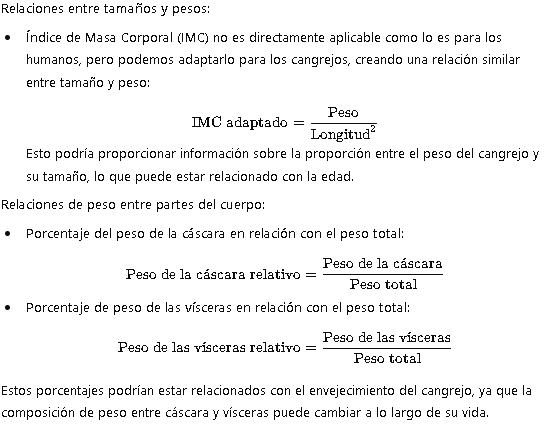

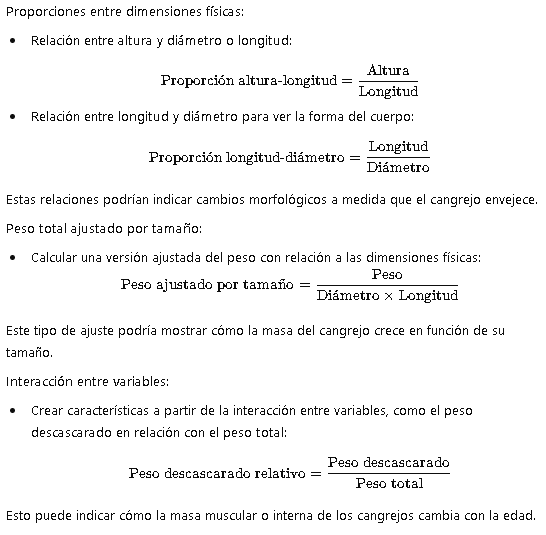

# Análisis exploratorio de datos (EDA)

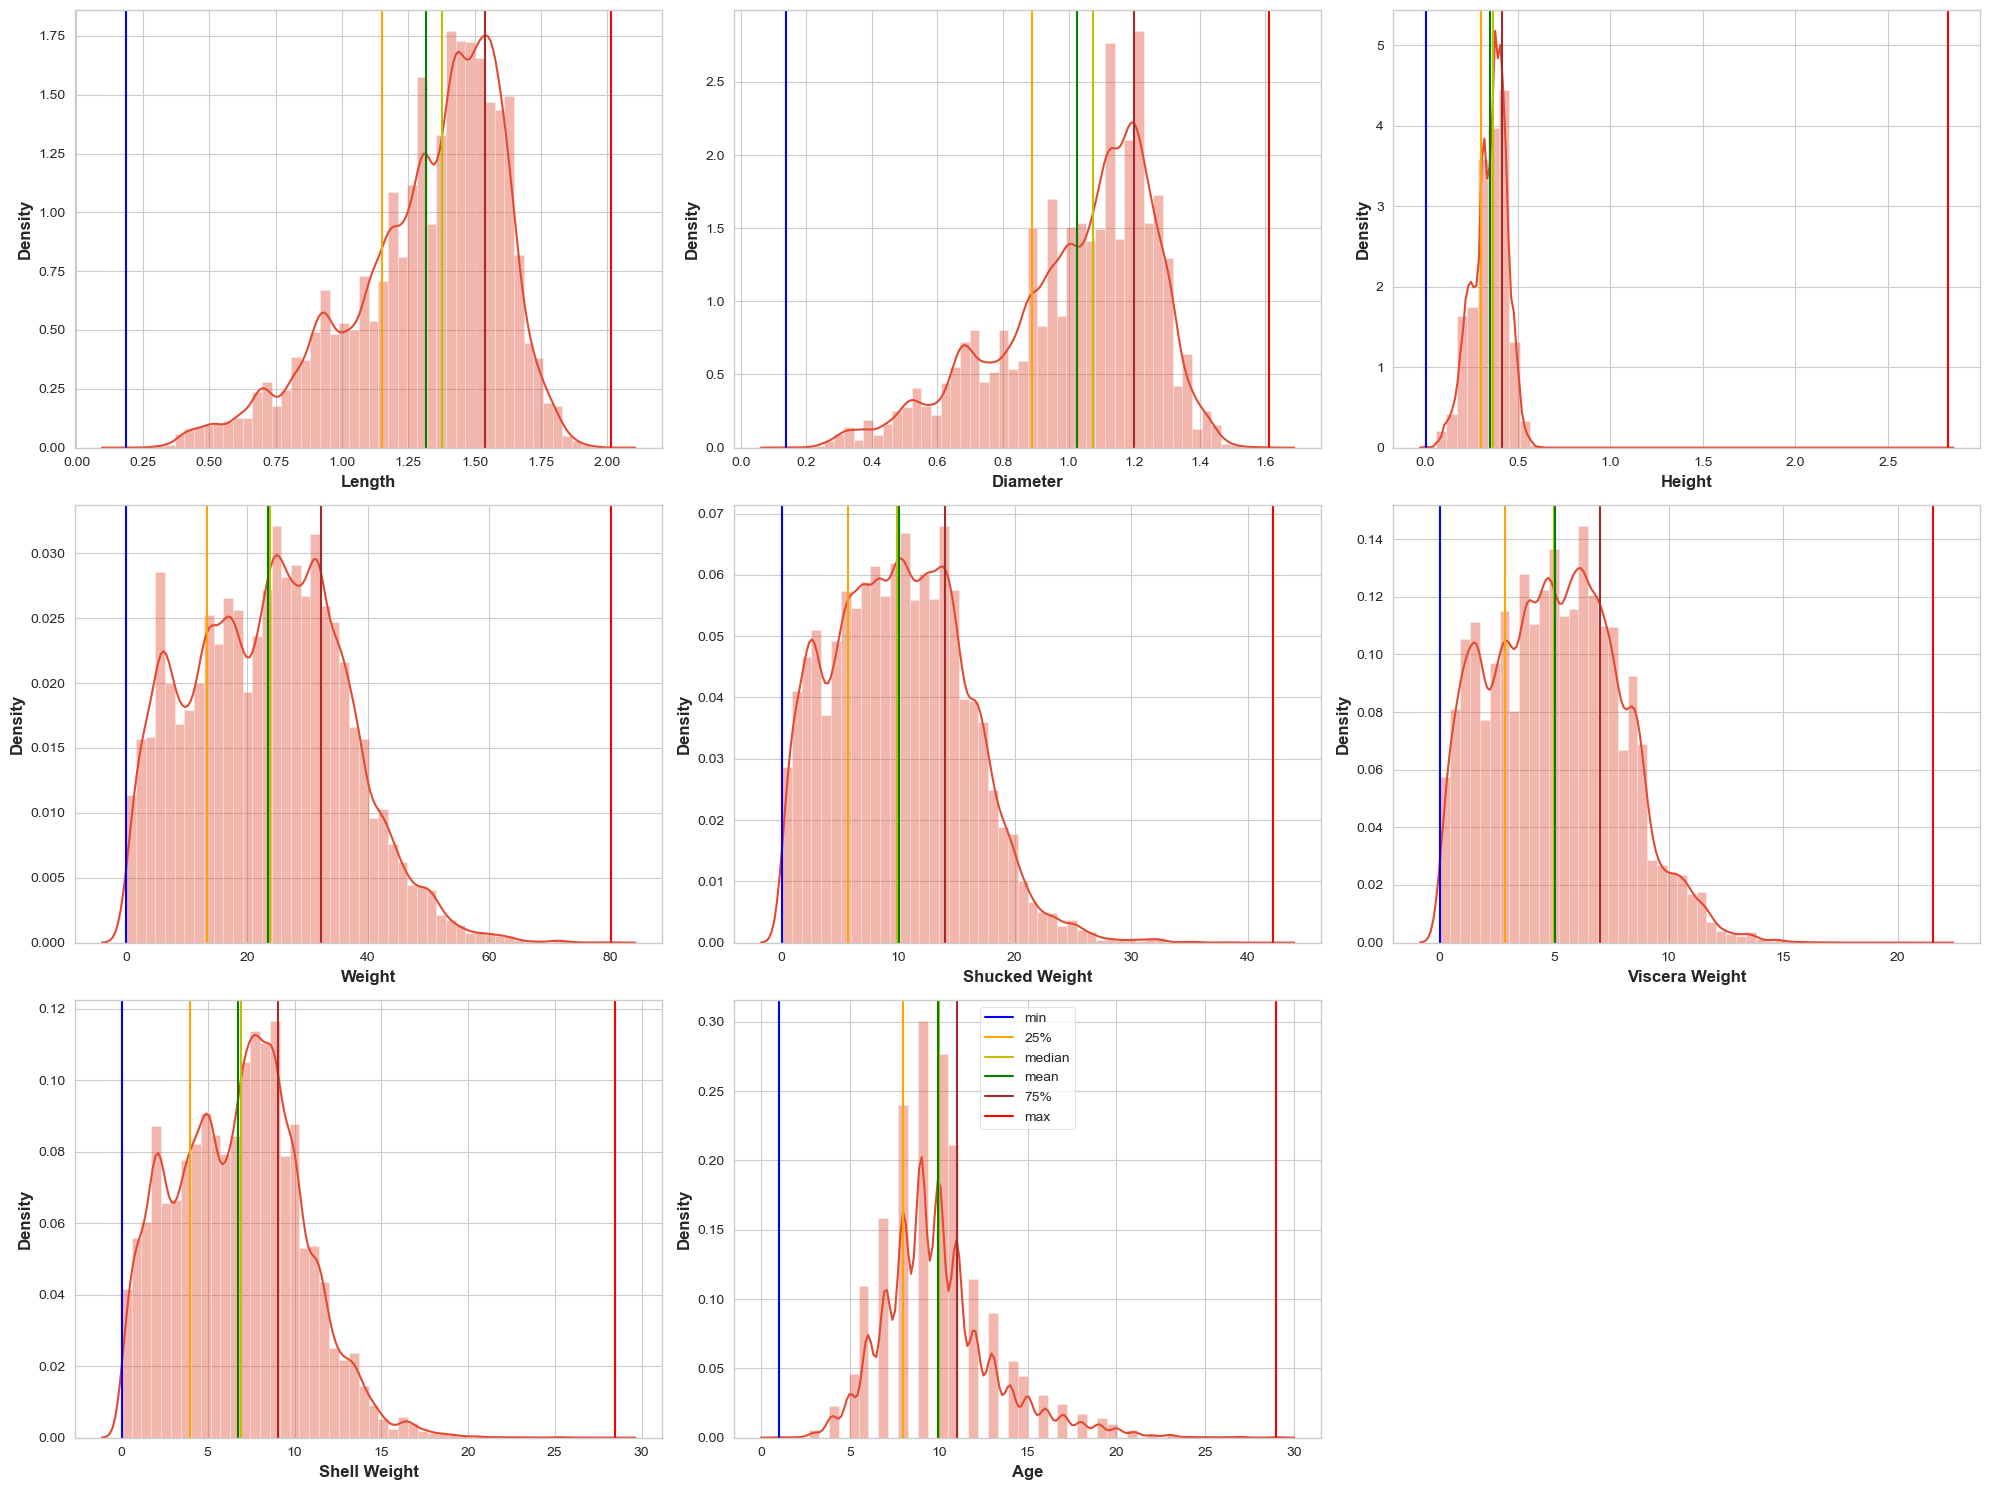

In [9]:
eda.exploration_num(train)

Este gráfico muestra las distribuciones de densidad (probabilidad) para varias características de los cangrejos del dataset, como **Length (Longitud)**, **Diameter (Diámetro)**, **Height (Altura)**, **Weight (Peso)**, **Shucked Weight (Peso descascarado)**, **Viscera Weight (Peso de las vísceras)** y otros. Los diferentes colores representan los percentiles y estadísticas clave de los datos:

- **Blue line (min)**: La línea azul marca el valor mínimo de la variable.
- **Yellow line (25%)**: Marca el primer cuartil (Q1), donde el 25% de los datos están por debajo de este valor.
- **Green line (median)**: La línea verde muestra la mediana, que es el valor central (Q2) cuando los datos están ordenados.
- **Orange line (mean)**: Representa la media (promedio) de la variable.
- **Red line (75%)**: Marca el tercer cuartil (Q3), donde el 75% de los datos están por debajo de este valor.
- **Dark red line (max)**: Marca el valor máximo de la variable.

### Interpretación general:
1. **Asimetría en las distribuciones**: La mayoría de las distribuciones muestran una asimetría hacia la derecha (cola larga a la derecha), lo que indica que hay algunos valores atípicos altos en variables como el **peso** y el **peso de la cáscara**. Esto significa que la mayoría de los cangrejos tienen pesos relativamente bajos, pero unos pocos tienen pesos muy altos.

2. **Rangos amplios en algunas características**: Características como el **peso total** y el **peso descascarado** muestran un amplio rango de valores, con una gran variabilidad. Esto podría indicar que la edad de los cangrejos tiene una fuerte relación con estas características.

3. **Compactación en otras características**: Variables como la **altura** tienen una distribución mucho más concentrada, lo que sugiere que la altura no varía tanto entre los cangrejos y puede tener menos relación con la edad.

4. **Valores máximos y mínimos**: Las líneas azul oscuro y rojo oscuro, que marcan los valores mínimo y máximo, son muy distantes en algunas variables como **peso** y **peso de las vísceras**, lo que sugiere que hay cangrejos que son significativamente más pesados que otros.

### Implicación para la predicción de la edad:
- La variabilidad en variables como el **peso total**, **peso descascarado**, y **peso de las vísceras** podría ser clave para predecir la edad de los cangrejos, ya que parece haber una gran dispersión de estos valores.
- Por otro lado, variables más estables, como **altura** y **diámetro**, podrían no contribuir tanto al Tengo que s posible que quieras investigar más a fondo la **correlación** entre estas características y la edad para ver cuáles tienen una relación más fuerte. A partir de estpodranstribuciones, se puede observar que algunas variables presentan patrones que podrían ayudar en la regresión para predecir la edad de los cangrejos.

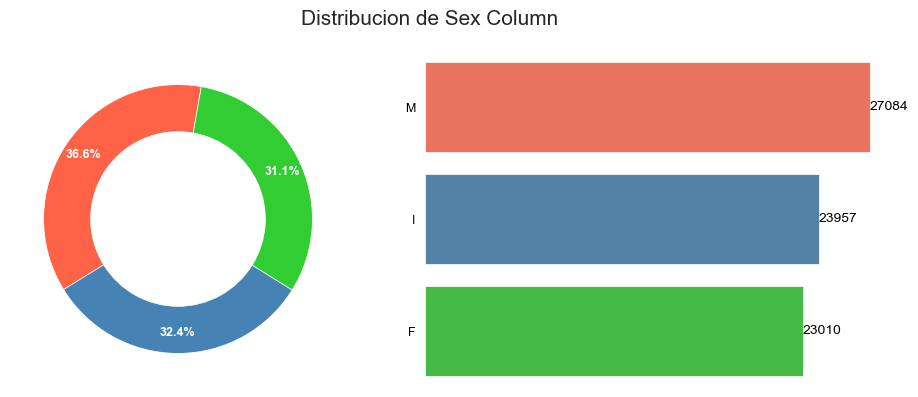

In [10]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()
value_counts = train['Sex'].value_counts()
labels = value_counts.index.tolist()
colors = ["#ff6347", "#4682b4", "#32cd32"]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=train, y='Sex', ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Distribucion de Sex Column', fontsize=15)
plt.tight_layout()
plt.show()


### No vemos vemos un desbalance. "Sex" esta bien distribuida

## Análisis Bivariado

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,23010.0,11.341547,2.957291,4.0,9.0,11.0,13.0,29.0
I,23957.0,7.599073,2.229675,1.0,6.0,7.0,8.0,24.0
M,27084.0,10.895953,2.882714,3.0,9.0,10.0,12.0,29.0


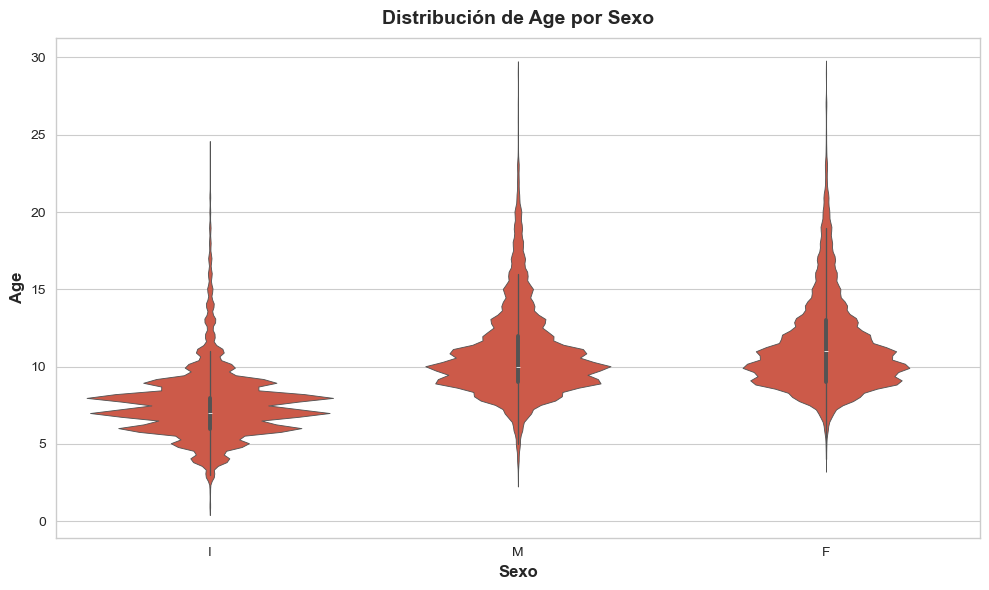

In [11]:
summary = train.groupby('Sex')['Age'].describe()
display(summary)

# Crear el diagrama de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=train)

# Añadir títulos y etiquetas
plt.title('Distribución de Age por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Age')

# Mostrar el gráfico
plt.show()

### ¿Qué nos muestra la gráfica?

* Tres grupos: La gráfica divide los datos en tres grupos según el sexo: un grupo sin etiqueta (podríamos asumir que es un tercer género o una categoría "no binario" o "Indeterminado"), machos (M) y hembras (F).

* Distribución de edades: Cada grupo se representa con un gráfico de violín. Estos gráficos muestran la distribución de las edades dentro de cada grupo. La parte más ancha del violín indica donde se concentra la mayor cantidad de cangrejos de una edad determinada.

* Rango de edades: El eje vertical representa la edad, y podemos observar que el rango de edades va desde 0 hasta aproximadamente 30 años.

* Comparación entre sexos: Los gráficos de violín permiten comparar visualmente la distribución de edades entre los diferentes sexos.

### Interpretación de los resultados:

* Distribución similar: Los tres grupos presentan una distribución de edades bastante similar, con una concentración de cangrejos entre los 5 y 15 años.

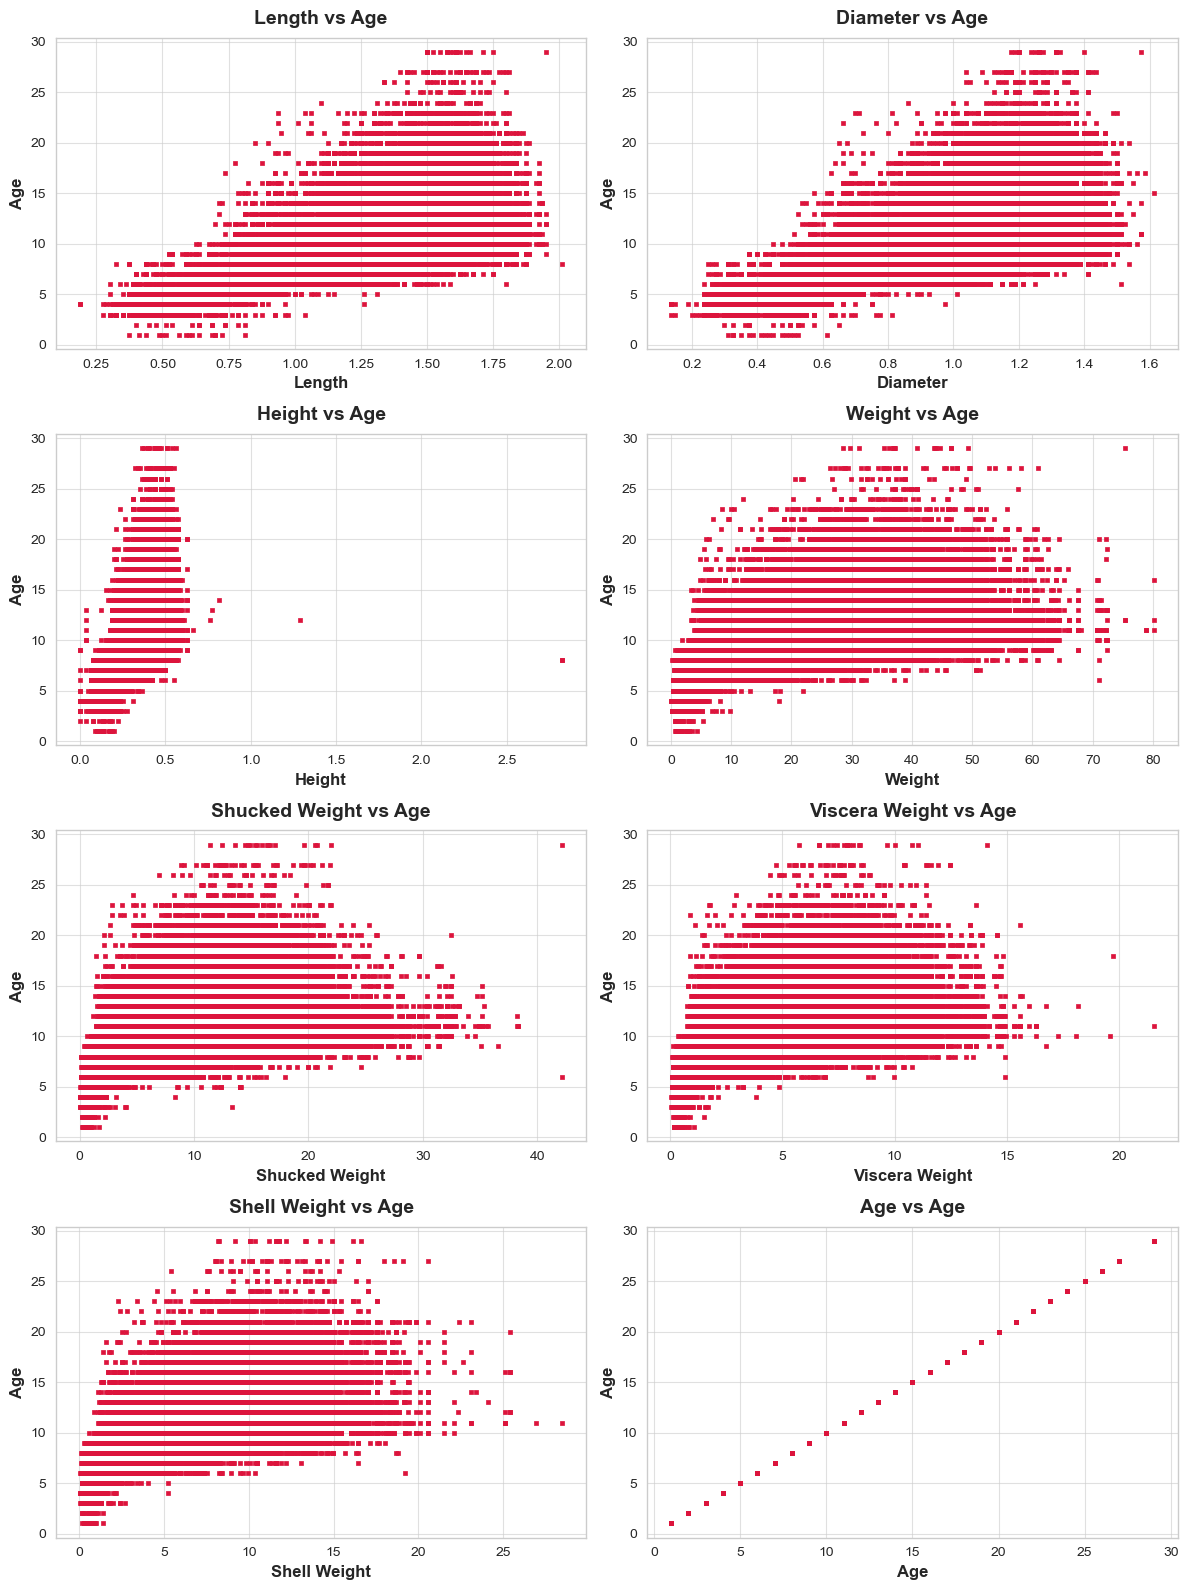

In [12]:
numeric_columns = train.select_dtypes(include=['float64', 'int64'])
eda.scarplot_strongs_vars(train,'Age', numeric_columns)

## Correlacion _ Mapa de calor

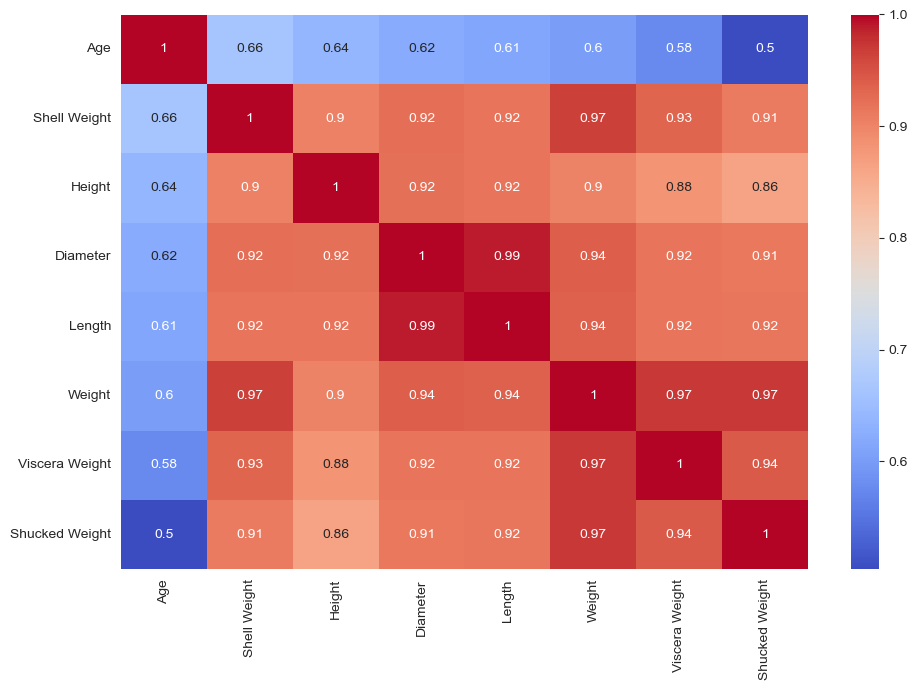

In [13]:
corr = eda.plot_high_corr_heatmap(train, 'Age')

* parece que el peso de la cáscara es el mejor indicador de la edad, seguido por variables relacionadas con el tamaño físico como el diámetro y la altura

---

Este es un **mapa de calor de correlaciones** que muestra las relaciones entre la variable objetivo (en este caso, **"Age"** - Edad) y las diferentes características o variables que miden atributos físicos de los cangrejos, como el peso, la altura, el diámetro, etc.

### Interpretación del mapa de calor:
1. **Escala de color**: 
   - Los colores oscuros (rojo oscuro) indican una **alta correlación positiva** (cercana a 1), lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
   - Los colores más claros (azul) indican **baja correlación** o **correlación negativa** (cercana a 0), lo que implica que no hay una relación lineal clara entre las variables.

2. **Correlación de la Edad (Age) con otras variables**:
   - **Shell Weight (Peso de la cáscara)** tiene la mayor correlación con la edad (**0.66**). Esto sugiere que a medida que los cangrejos envejecen, el peso de la cáscara aumenta, lo cual puede ser un indicador clave para pronosticar la edad.
   - **Height (Altura)** y **Diameter (Diámetro)** también muestran correlaciones moderadas con la edad, en torno a **0.64** y **0.62**, respectivamente. Estas variables también podrían ayudar a estimar la edad, aunque su impacto es menor que el peso de la cáscara.
   - **Shucked Weight (Peso descascarado)** tiene la correlación más baja con la edad (**0.5**), lo que sugiere que no es tan relevante para predecir la edad en comparación con otras características.

3. **Relaciones entre las otras variables**:
   - Hay una alta correlación entre varias de las características físicas, como el **Peso total (Weight)** y el **Peso de las vísceras (Viscera Weight)** (correlación de **0.97**). Esto sugiere que las variables están relacionadas entre sí y probablemente describen aspectos físicos similares de los cangrejos.
   - Las variables **Length (Longitud)**, **Diameter (Diámetro)** y **Height (Altura)** también están altamente correlacionadas entre sí, lo cual es esperable ya que son dimensiones físicas del cuerpo del cangrejo.

### Conclusiones clave para la predicción de la edad:
1. **Shell Weight es la variable más importante**: Con una correlación de **0.66**, el peso de la cáscara parece ser el mejor predictor de la edad de los cangrejos en este conjunto de datos. Incluir esta variable en un modelo predictivo será crucial para mejorar la precisión de la predicción de la edad.
  
2. **Altura, Diámetro y Longitud**: Estas variables también muestran una correlación moderada con la edad (alrededor de 0.6), lo que las convierte en predictores útiles, pero menos influyentes que el peso de la cáscara.

3. **Peso descascarado (Shucked Weight)**: Tiene una baja correlación con la edad, por lo que podría ser menos útilen el modelo. Podrías considerar excluir esta variable o darle menor peso en el modelo predictivo.

4. **Multicolinealidad**: La alta correlación entre algunas variales sugiere que podrías experimentar **multicolinealidad** al usarlas enne el diámetro y la altura.

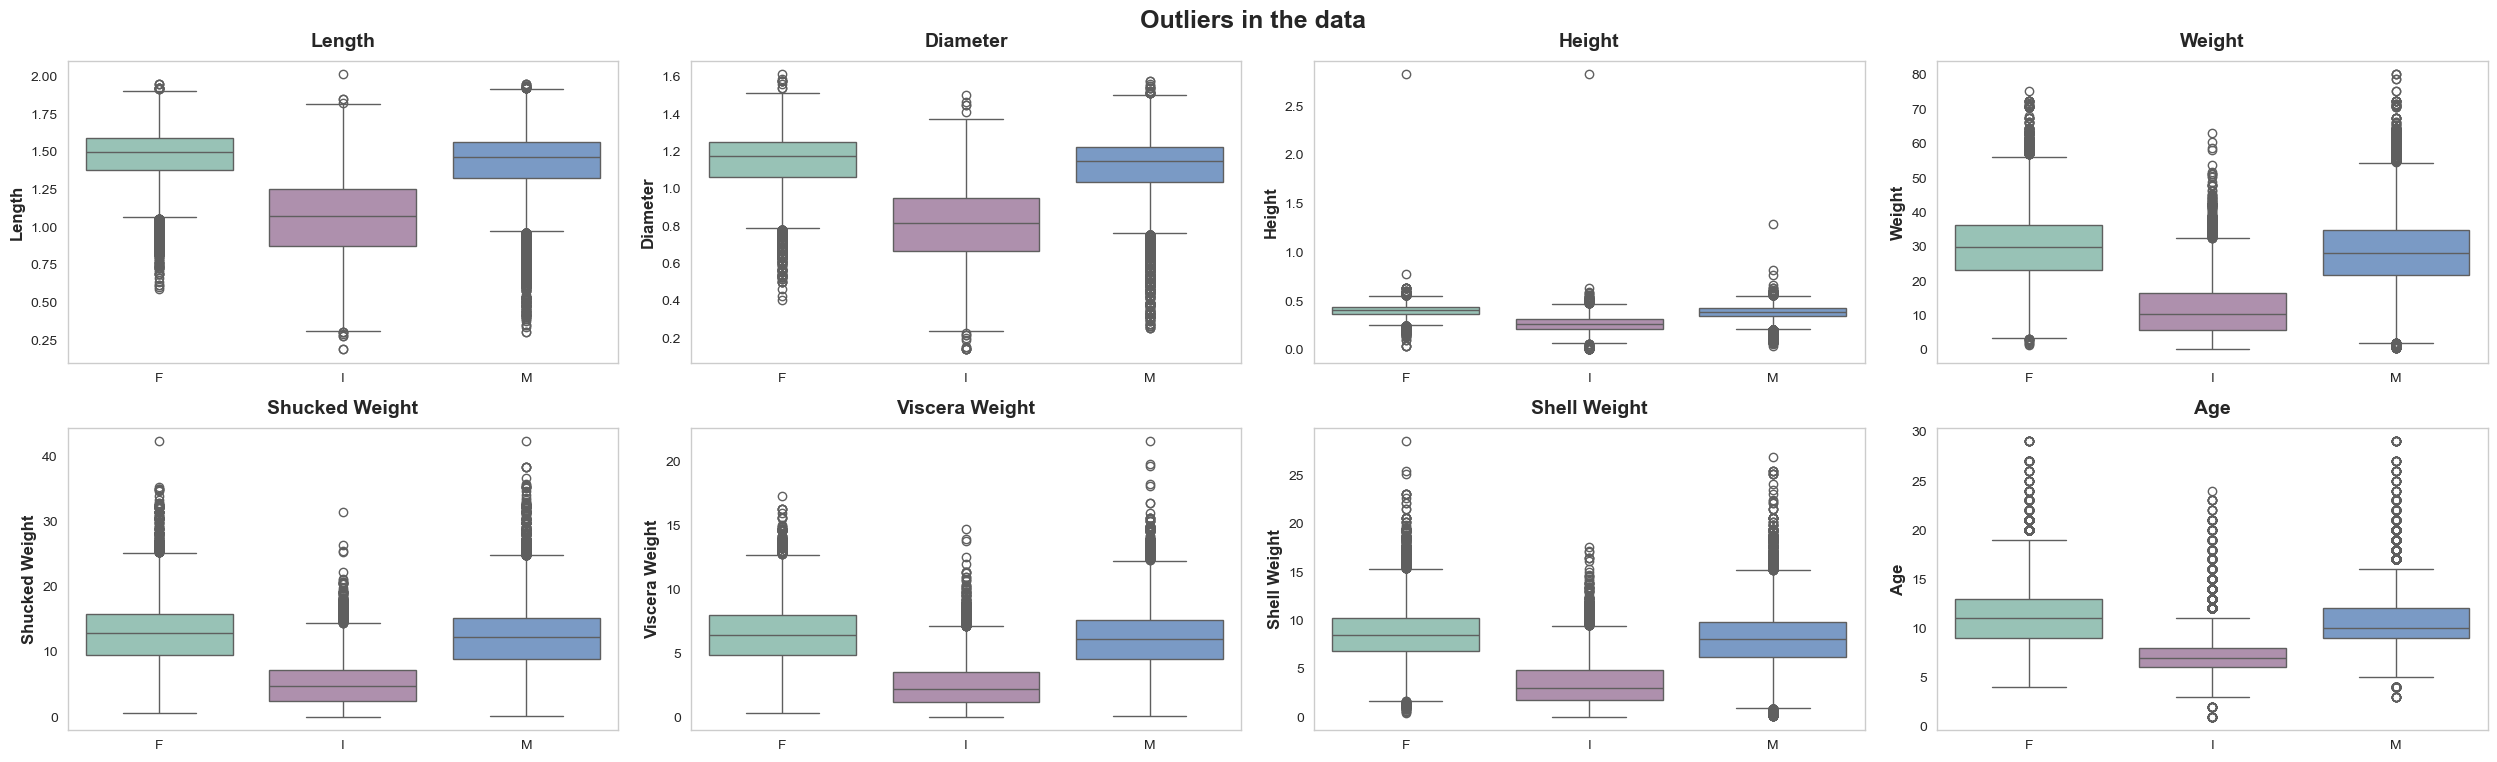

In [14]:
train['Sex'] = train['Sex'].astype('category')
custom_palette = {'F': '#91c9b9', 'M': '#6d98d1', 'I': '#b38bb2'}
# Check for presence of outliers in each feature
fig = plt.figure(figsize=[25,15])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(4,4, i+1)
    sns.boxplot(data=train, y=col, x='Sex', palette=custom_palette, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    ax.grid(False)
plt.show()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345


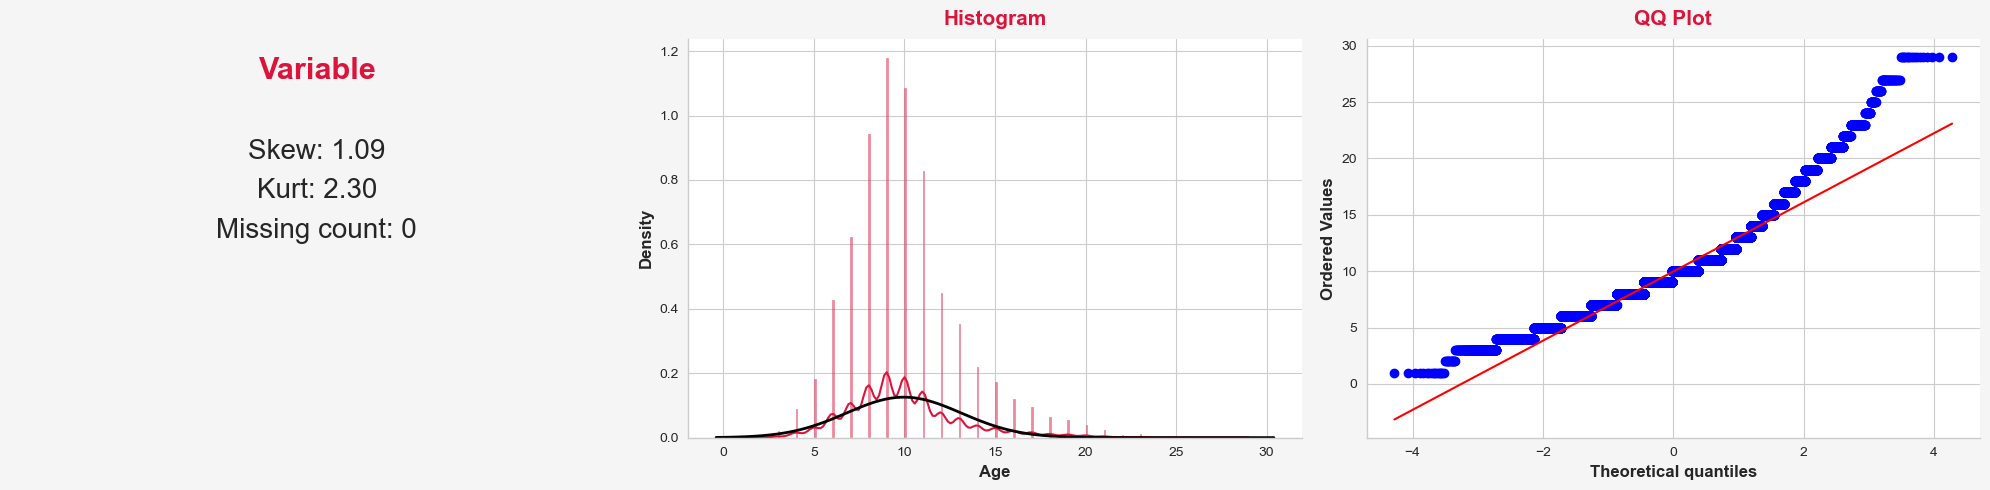

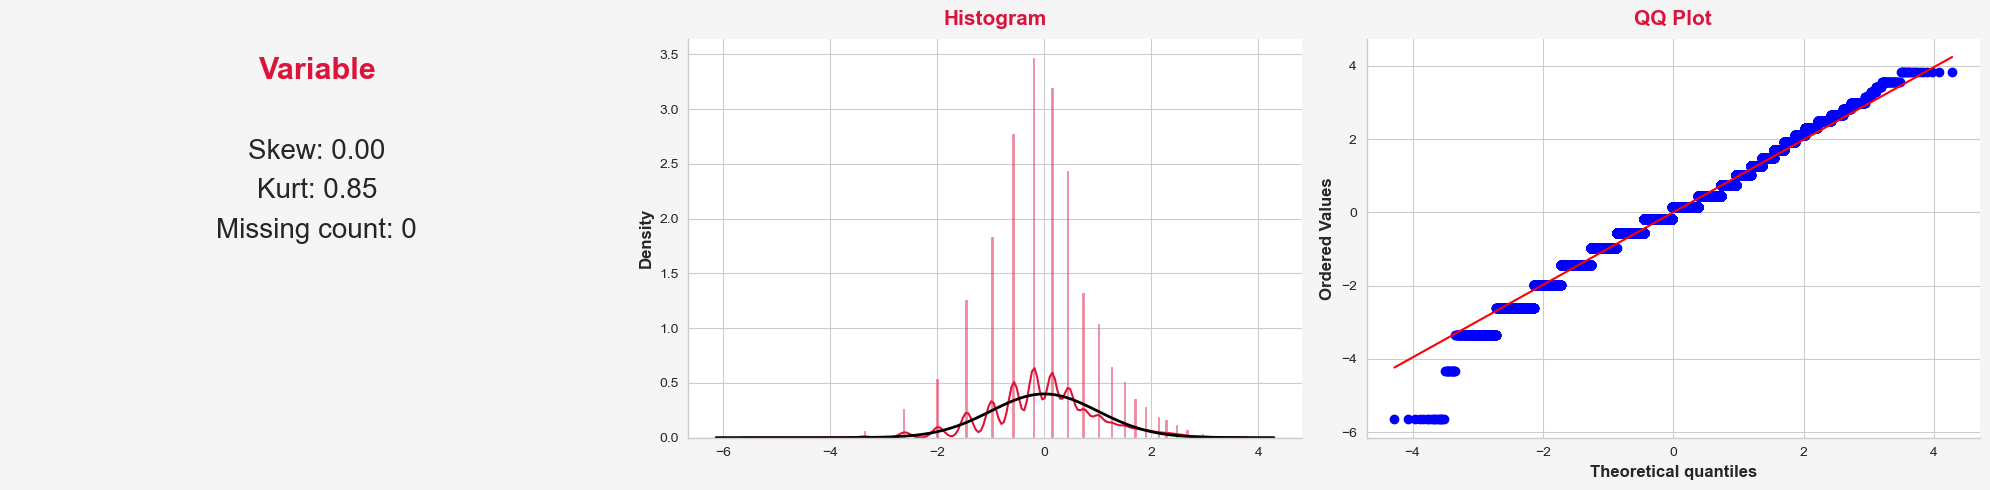

In [15]:
#concact both train & original datasets
y = train.pop("Age")
full = pd.concat([train,test], axis = 0)
display(full)

eda.plot_variable_distribution(y)
eda.plot_variable_distribution(y,use_yeo_johnson=True)



### Histograma
- **Interpretación**: El histograma es una representación de la distribución de la variable "Age". Aunque la variable es discreta, el histograma  proporciona una idea clara de la **frecuencia** de cada valor de edad, por lo que sigue siendo útil para visualizar cómo se distribuyen los valores en los datos
- El histograma es aplicable tanto a variables discretas como continuas, aunque en el caso de las discretas, los valores en el eje X son discretos (en lugar de rangos continuos). Es un buen gráfico para mostrar la frecuencia de los distintos valores de edad.

### QQ Plot (Gráfico Quantile-Quantile)
- **Interpretación**: El gráfico QQ compara la distribución de la variable "Age" con una distribución teórica (normal en este caso). Muestra qué tan bien los datos siguen la distribución teórica al trazar los cuantiles de los datos frente a los cuantiles de la distribución normal.
- **Validez para variables discretas**: 
  - Los gráficos QQ son más comúnmente utilizados para variables continuas, ya que comparan la forma de una distribución empírica con una teórica. En el caso de variables discretas, es menos común, ya que los valores pueden estar más agrupados, lo que puede generar "escalones" en lugar de una línea continua en el gráfico QQ.
  - **Posible problema**: Para datos discretos, es posible que el gráfico QQ no sea tan informativo, ya que los datos pueden no seguir una distribución teórica suave como la normal. Esto puede generar puntos agrupados en los extremos delo no una normal.

# Definimos "BaseLine".

o sea, una funcion para ir comparando cual de los pasos que damos es el "correcto".


### Métricas devueltas:
- **Mean Absolute Error (MAE)**: Representa el error promedio absoluto entre las predicciones y los valores reales.
- **Mean Squared Error (MSE)**: El promedio de los errores al cuadrado entre las predicciones y los valores reales.
- **Root Mean Squared Error (RMSE)**: La raíz cuadrada de MSE, una métrica comúnmente usada que tiene la misma escala que las variables originales.
- **R² Score**: El coeficiente de determinación, que mide qué tan bien las predicciones se ajustan a los valores reales (1 es un ajuste perfec datos.

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def encode_categorical(X, encoding_type="label"):
    """Encode categorical features based on encoding_type: 'label' or 'onehot'."""
    X_encoded = X.copy()
    
    if encoding_type == "label":
        # Label encoding for categorical columns
        for colname in X_encoded.select_dtypes(["category"]).columns:
            X_encoded[colname] = X_encoded[colname].cat.codes
    
    elif encoding_type == "onehot":
        # One-hot encoding for categorical columns
        X_encoded = pd.get_dummies(X_encoded, drop_first=True)
    
    return X_encoded

def score_dataset(X, y, model=XGBRegressor(), encoding_type="label", cv=5):
    """
    Evaluate a dataset using cross-validation and return multiple evaluation metrics.
    
    Parameters:
    - X: Features (DataFrame)
    - y: Target (Series)
    - model: Machine learning model (default: XGBRegressor)
    - encoding_type: Type of encoding for categorical features ("label" or "onehot")
    - cv: Number of cross-validation folds (default: 5)
    
    Returns:
    A dictionary containing the following metrics:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - R² Score
    """
    
    # Encode categorical features based on chosen encoding type
    X_encoded = encode_categorical(X, encoding_type=encoding_type)
    
    # Use cross_val_predict to get predictions across all cross-validation folds
    y_pred = cross_val_predict(model, X_encoded, y, cv=cv)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    # Return a dictionary with all metrics
    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    # Mostrar las métricas
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    
    return metrics




In [93]:
%%time
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
metrics = score_dataset(train, y, model=lr, encoding_type="label",cv=4)

Mean Absolute Error (MAE): 1.5074
Mean Squared Error (MSE): 4.6477
Root Mean Squared Error (RMSE): 2.1559
R² Score: 0.5390
CPU times: total: 344 ms
Wall time: 264 ms


In [18]:
%%time
# Ejemplo de uso con un DataFrame X y un target y
metrics = score_dataset(train, y, model=XGBRegressor(), encoding_type="label",cv=4)

Mean Absolute Error (MAE): 1.4203
Mean Squared Error (MSE): 4.2993
Root Mean Squared Error (RMSE): 2.0735
R² Score: 0.5736
CPU times: total: 5.64 s
Wall time: 2.61 s


# Mutula Information score. Evaluamos utilidad de caracteristicas

In [19]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(train, y)
mi_scores

Shell Weight      0.562599
Weight            0.501156
Height            0.492155
Diameter          0.490658
Viscera Weight    0.488196
Length            0.476729
Shucked Weight    0.453888
Sex               0.243910
Name: MI Scores, dtype: float64

La salida de la función muestra los **"MI Scores"** (puntuaciones de Información Mutua) de las características de tu conjunto de datos. Estas puntuaciones miden cuánta información acerca de la variable objetivo (en este caso, probablemente "Age" o "Edad") se puede obtener de cada característica.

### Interpretación breve:
- **Shell Weight** (Peso de la cáscara) tiene el mayor "MI Score" (0.5626), lo que sugiere que es la característica que más contribuye a predecir la variable objetivo.
- Las características con puntajes más altos (como **Weight**, **Height**, **Diameter**) tienen más poder predictivo, mientras que **Sex** (0.2439) tiene una influencia mucho menor

# Ingeniería de caracteristicas:

## Principal Component Analysis

In [25]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [28]:
def mathematical_transforms(df):
    X = pd.DataFrame()  # dataframe to hold new features
    X["IMC_ADAPTADO"] = df.Weight / (df.Length**2)
    X["PESO_CASCARA_RELATIVO"] = df["Shell Weight"]/df["Weight"]
    X["PROPORCION_DE_ALTURA_LONGITUD"] = df["Height"]/df["Length"]
    X["PROPORCION_DE_LONGITUD_DIAMETRO"] = df["Length"]/df["Diameter"]
    # This feature ended up not helping performance
    # X["TotalOutsideSF"] = \
    #     df.WoodDeckSF + df.OpenPorchSF + df.EnclosedPorch + \
    #     df.Threeseasonporch + df.ScreenPorch
    return X


* Vemos que la creacion de estas caracteristicas empeoro nuestro score un poco. principalmente en nuestro R2

In [94]:
x = mathematical_transforms(train) # vemos que la transformacion matematica empeoro # por tante lo descartamos. 

metric = score_dataset(x, y, cv = 4)
metric 

KeyError: 'Shucked Weight'

In [78]:
train["Shucked Weight"]

id
0        12.728926
1         4.521745
2        11.339800
3        20.354941
4        11.977664
           ...    
74046    20.680960
74047     4.323299
74048    12.303683
74049     8.972617
74050     2.055339
Name: Shucked Weight, Length: 74051, dtype: float64

In [79]:
import pandas as pd

def mathematical_transforms2(df):
    # Asegúrate de que las columnas necesarias existen en df
    X = pd.DataFrame()  # DataFrame to hold new features
    X['Meat Yield'] = df['Shucked Weight'] / (df['Weight'] + df['Shell Weight'])
    X['Shell Ratio'] = df['Shell Weight'] / df['Weight']
    X['Weight_to_Shucked_Weight'] = df['Weight'] / df['Shucked Weight']
    X['Viscera Ratio'] = df['Viscera Weight'] / df['Weight']

    return X

# Llamar a la función con el DataFrame 'train'
X = mathematical_transforms2(train)

# Calcular la puntuación mi_score
mi_score = make_mi_scores(X, y)


In [82]:

XX

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Meat Yield,Shell Ratio,Weight_to_Shucked_Weight,Viscera Ratio
id,,,,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0.341056,0.288160,2.276169,0.229452
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.327179,0.326531,2.304075,0.223129
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.360685,0.268879,2.185000,0.224256
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0.310017,0.296027,2.488858,0.216970
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.409598,0.255630,1.944379,0.193548
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,0.328308,0.243425,2.449623,0.204533
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,0.309017,0.339213,2.416393,0.219810
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,0.327547,0.274038,2.396313,0.255769


In [83]:
mi_score = make_mi_scores(XX, y)


In [84]:
mi_score

Shell Weight                0.566097
Weight                      0.507238
Diameter                    0.489377
Height                      0.489227
Viscera Weight              0.483946
Length                      0.480865
Shucked Weight              0.452911
Sex                         0.245704
Weight_to_Shucked_Weight    0.214093
Shell Ratio                 0.201532
Meat Yield                  0.160489
Viscera Ratio               0.141271
Name: MI Scores, dtype: float64

In [96]:
# XX_score = score_dataset(XX,y, model = XGBRegressor(),cv = 5)
# vv = score_dataset(XX, y, model=XGBRegressor(), encoding_type="label",cv=4)
metrics = score_dataset(XX, y, model=XGBRegressor(), encoding_type="label",cv=4)

Mean Absolute Error (MAE): 1.4251
Mean Squared Error (MSE): 4.3330
Root Mean Squared Error (RMSE): 2.0816
R² Score: 0.5702


In [35]:
def apply_pca(X, standardize=True):
    for colname in X.select_dtypes(["category"]).columns:
            X[colname] = X[colname].cat.codes
    
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def pca_inspired(df):
    X = pd.DataFrame()
    X["Feature1"] = df.GrLivArea + df.TotalBsmtSF
    X["Feature2"] = df.YearRemodAdd * df.TotalBsmtSF
    return X


def pca_components(df, features):
    X = df.loc[:, features]
    _, X_pca, _ = apply_pca(X)
    return X_pca

In [36]:
_, pca_train,_ = apply_pca(train, standardize=True)
pca_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.355848,-0.051105,0.018397,-0.280764,0.133244,0.109428,-0.061602,-0.037880
1,-2.387028,-0.091033,0.228855,-0.063076,0.029030,0.011263,-0.062598,-0.023784
2,0.515135,1.159942,0.177145,-0.145219,-0.153909,0.057709,0.098467,-0.026770
3,4.939543,-1.243552,-0.565711,0.527039,0.235021,0.027720,0.192711,0.006769
4,-0.183442,-0.064208,-0.212818,-0.127622,-0.283063,-0.268433,0.136331,-0.038549
...,...,...,...,...,...,...,...,...
74046,4.055297,-1.246778,-1.077260,0.122044,-0.082850,0.018830,-0.095802,0.310810
74047,-2.361243,-0.091223,0.267617,-0.063461,0.091915,0.008063,0.107323,-0.044143
74048,1.588883,-1.269940,0.163375,-0.044484,-0.111872,0.406427,0.109278,-0.040927
74049,-1.203888,-0.072329,0.173553,-0.302121,-0.226926,-0.292274,0.084343,-0.019014


In [37]:
pca_score = score_dataset(pca_train, y)

Mean Absolute Error (MAE): 1.4510
Mean Squared Error (MSE): 4.4644
Root Mean Squared Error (RMSE): 2.1129
R² Score: 0.5572


In [38]:
score_base = score_dataset(train, y)

Mean Absolute Error (MAE): 1.4196
Mean Squared Error (MSE): 4.2975
Root Mean Squared Error (RMSE): 2.0730
R² Score: 0.5737


In [40]:
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607


In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import optuna

def score_dataset(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    mae = mean_absolute_error(y_train, preds)
    return mae

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
        n_jobs=-1  # Usar todos los núcleos disponibles en el entrenamiento de XGBoost
    )
    xgb = XGBRegressor(**xgb_params)
    return score_dataset(train, y, xgb)

# Crear un estudio Optuna y paralelizar los trials
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, n_jobs=-1)  # Paralelizar Optuna

xgb_params = study.best_params


[I 2024-10-20 00:44:15,306] A new study created in memory with name: no-name-51c3520f-b203-4cc3-a8ce-01d0a8bdbd44
[I 2024-10-20 00:46:32,556] Trial 0 finished with value: 1.4201465573578533 and parameters: {'max_depth': 7, 'learning_rate': 0.0013460429432448763, 'n_estimators': 2502, 'min_child_weight': 4, 'colsample_bytree': 0.41719050792015966, 'subsample': 0.5472214881734672, 'reg_alpha': 2.764758999951854, 'reg_lambda': 4.6148261494552125}. Best is trial 0 with value: 1.4201465573578533.
[I 2024-10-20 00:46:50,838] Trial 3 finished with value: 1.4320668485928956 and parameters: {'max_depth': 2, 'learning_rate': 0.0029736869593447357, 'n_estimators': 7607, 'min_child_weight': 2, 'colsample_bytree': 0.42100019832125063, 'subsample': 0.9266372994251508, 'reg_alpha': 0.07247214687912844, 'reg_lambda': 0.09130399808515301}. Best is trial 0 with value: 1.4201465573578533.
[I 2024-10-20 00:47:31,247] Trial 5 finished with value: 1.4058050610911565 and parameters: {'max_depth': 3, 'learnin

[I 2024-10-20 00:56:34,571] Trial 15 finished with value: 0.8180501796195007 and parameters: {'max_depth': 10, 'learning_rate': 0.019275733281524893, 'n_estimators': 3203, 'min_child_weight': 10, 'colsample_bytree': 0.9520927366641595, 'subsample': 0.7192075090289722, 'reg_alpha': 0.00010429296731664128, 'reg_lambda': 0.0034120023246996443}. Best is trial 14 with value: 0.17069806174258567

In [57]:
test2 = test.copy()
# Creamos un LabelEncoder
enc2 = LabelEncoder()

test2["Sex"] = enc2.fit_transform(test2)

In [109]:
train1, test2 = data_load()
train, test = data_load()

X = mathematical_transforms2(train)
PP = mathematical_transforms2(test)
XXX = pd.concat([train,X],axis=1)
XXXtest = pd.concat([test,PP],axis=1)

enc3 = LabelEncoder()

XXX["Sex"] = enc3.fit_transform(XXX["Sex"])
XXXtest["Sex"] = enc3.fit_transform(XXXtest["Sex"])

In [110]:
y = XXX.pop("Age")

In [111]:
def custom_round(value):
    if value - int(value) >= 0.5:  # Redondear hacia arriba si es >= 0.5
        return int(value) + 1
    else:  # Redondear hacia abajo si es < 0.5
        return int(value)
    
custom_round(4.56)

5

In [112]:
XXX

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Meat Yield,Shell Ratio,Weight_to_Shucked_Weight,Viscera Ratio
id,,,,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0.341056,0.288160,2.276169,0.229452
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.327179,0.326531,2.304075,0.223129
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.360685,0.268879,2.185000,0.224256
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0.310017,0.296027,2.488858,0.216970
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.409598,0.255630,1.944379,0.193548
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,0.328308,0.243425,2.449623,0.204533
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,0.309017,0.339213,2.416393,0.219810
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,0.327547,0.274038,2.396313,0.255769


In [113]:
print("NaN values in training set (XXX):", XXX.isnull().sum())
print("NaN values in test set (XXXtest):", XXXtest.isnull().sum())


NaN values in training set (XXX): Sex                         0
Length                      0
Diameter                    0
Height                      0
Weight                      0
Shucked Weight              0
Viscera Weight              0
Shell Weight                0
Meat Yield                  0
Shell Ratio                 0
Weight_to_Shucked_Weight    0
Viscera Ratio               0
dtype: int64
NaN values in test set (XXXtest): Sex                         0
Length                      0
Diameter                    0
Height                      0
Weight                      0
Shucked Weight              0
Viscera Weight              0
Shell Weight                0
Meat Yield                  0
Shell Ratio                 0
Weight_to_Shucked_Weight    0
Viscera Ratio               0
dtype: int64


In [114]:
xgb = XGBRegressor(**xgb_params)
# XGB minimizes MSE, but competition loss is RMSLE
# So, we need to log-transform y to train and exp-transform the predictions
xgb.fit(XXX, y)
predictions = xgb.predict(XXXtest)

def custom_round(value):
    if value - int(value) >= 0.5:  # Redondear hacia arriba si es >= 0.5
        return int(value) + 1
    else:  # Redondear hacia abajo si es < 0.5
        return int(value)

rounded_predictions_custom = np.array([custom_round(pred) for pred in predictions])

output = pd.DataFrame({'id': test.index, 'SalePrice': rounded_predictions_custom})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
